## Anomaly detection

In this exercise,you will implement an anomaly detection algorithm to detect anomalous behavior in server computers.

You will use a Gaussian model to detect anomalous examples in your dataset.

You will first start on a 2D dataset that will allow you to visualize what the algorithm is doing. 

using ex8data1.mat

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split

%matplotlib inline
%config InlineBackend.figure_format='svg'

In [2]:
mat=loadmat('./data/ex8data1.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])

In [3]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Dec  1 15:37:10 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[13.04681517, 14.74115241],
        [13.40852019, 13.7632696 ],
        [14.19591481, 15.85318113],
        [14.91470077, 16.17425987],
        [13.57669961, 14.04284944],
        [13.92240251, 13.40646894],
        [12.82213164, 14.22318782],
        [15.67636615, 15.89169137],
        [16.16287532, 16.20299807],
        [12.66645095, 14.89908374],
        [13.98454962, 12.95800822],
        [14.06146043, 14.54908874],
        [13.38988671, 15.56202142],
        [13.39350475, 15.62698794],
        [13.97900926, 13.28061494],
        [14.16791259, 14.46583829],
        [13.96176145, 14.75182421],
        [14.45899735, 15.07018563],
        [14.58476372, 15.82743424],
        [12.07427074, 13.0671109 ],
        [13.5491294 , 15.53827677],
        [13.98625042, 14.78776304],
        [14.96991942, 16.51830493],
        [14.25576597, 15.294

In [4]:
X=mat.get('X')
data=pd.DataFrame(X,columns=['Latency', 'Throughput'])

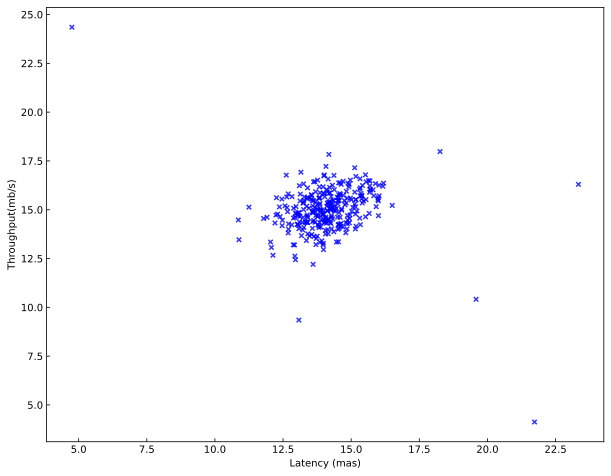

In [5]:
# plot the data

plt.figure(figsize=(10,8))
plt.xlabel("Latency (mas)")
plt.ylabel("Throughput(mb/s)")
plt.tick_params(direction='in')
plt.scatter(data['Latency'],data['Throughput'],color='Blue',s=20,marker='x',alpha=0.8)

### 1.1 Gaussian distribution

The **Gaussian distribution** is given by:

$$p(x;u,\sigma^{2})=\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{(x-u)^{2}}{2\sigma^{2}}}$$

Which u is the mean and sigma square is the variance

### 1.2 Estimating parameters for a Gaussian

To estimate the mean, you will use:

$$u_{i}=\frac{1}{m}\sum_{j=1}^{m}x_{i}^{j}$$

or the variance you will use:

$$\sigma_{i}^{2}=\frac{1}{m}\sum_{j=1}^{m}{(x_{i}^{j}-u_{i})^{2}}$$

In [6]:
def estimate_gaussian(X):
    mu=X.mean(axis=0)
    sigma=X.var(axis=0)
    
    return mu,sigma

In [21]:
mu, sigma = estimate_gaussian(X)
mu, sigma

(array([14.11222578, 14.99771051]), array([1.83263141, 1.70974533]))

### 1.3 Selecting the threshold, ε

The F1 score is computed using precision (prec) and recall (rec):

$$F_{1}=\frac{2*prec*rec}{prec+rec}$$

You compute precision and recall by:

$$prec=\frac{tp}{tp+fp}$$

$$rec=\frac{tp}{tp+fn}$$

where:

    • tp is the number of true positives: the ground truth label says it’s an anomaly and our algorithm correctly classified it as an anomaly.
 
    • fp is the number of false positives: the ground truth label says it’s not an anomaly, but our algorithm incorrectly classified it as an anomaly.
    
    • fn is the number of false negatives: the ground truth label says it’s an anomaly, but our algorithm incorrectly classified it as not being anoma- lous.